<a href="https://colab.research.google.com/github/giorginolab/2023-GSN-Tutorial-BCN/blob/master/practice/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MD analysis: Gelsolin WT/mutant, apo/nanobody example 
## MSI course, Master in Bioinformatics for Health Sciences, UPF
*Toni Giorgino, IBF-CNR, Italy* - www.giorginolab.it

This is a Python notebook, based on Google Colaboratory platform. For an introduction to the platform, see [here](https://colab.research.google.com/notebooks/welcome.ipynb). You will be able to edit Python statements on this notebook by entering them into "cells", and execute them with the "play" button.

Notes:
 * The order of execution matters, not the order of display. 
 * To start from scratch, restart the runtime. 
 * Shell commands: prefix with an ! symbol.  E.g. `!ls -l` lists the contents of the current directory.
 * If you don't have a Google account, you may copy-paste the  statements in  local Python installations.
 * To plot, see examples [here](https://colab.research.google.com/notebooks/charts.ipynb).

The class is based on the following paper:

> Giorgino T, Analysis libraries for molecular trajectories: a cross-language synopsis. Chapter 20 in:  Biomolecular Simulations: Methods and Protocols Edited by M. Bonomi and C. Camilloni (Springer, ISBN 978-1-4939-9608-7).  [Preprint here](https://github.com/giorginolab/preprints-repository/tree/master/analysis_libraries_chapter)

and on the biological example from:

> Giorgino T, Mattioni D, Hassan A, Milani M, Mastrangelo E, Barbiroli A, et al. Nanobody interaction unveils structure, dynamics and proteotoxicity of the Finnish-type amyloidogenic gelsolin variant. Biochimica et Biophysica Acta (BBA) - Molecular Basis of Disease. 2019 Mar 1;1865(3):648–60. [Journal version](https://www.sciencedirect.com/science/article/pii/S0925443919300109?via%3Dihub). [Preprint here](https://arxiv.org/abs/1903.07308).





# Retrieve simulation trajectories

This copies data on the server which is running the calculations (not your computer). See below to download files to your PC.

In [ ]:
%pwd

'/Users/toni/Sync/publications/f_workshops/2023-GSN-Tutorial-BCN/solution'

In [ ]:
# Get the data files if not there yet
! [ -f MD-Tutorial-Data ] || git clone https://github.com/giorginolab/MD-Tutorial-Data.git

fatal: il percorso di destinazione 'MD-Tutorial-Data' esiste già e non è una directory vuota.


In [ ]:
%ls -l MD-Tutorial-Data/GSN

total 154728
-rw-r--r--  1 toni  staff   9578580 Apr 24 16:24 D187N+Nb-run-subset.xtc
-rw-r--r--  1 toni  staff   3505896 Apr 24 16:24 D187N+Nb-run.pdb
-rw-r--r--  1 toni  staff   4938249 Apr 24 16:24 D187N+Nb-run.psf
-rw-r--r--  1 toni  staff   8284912 Apr 24 16:24 D187N-run-subset.xtc
-rw-r--r--  1 toni  staff   2086286 Apr 24 16:24 D187N-run.pdb
-rw-r--r--  1 toni  staff   2877716 Apr 24 16:24 D187N-run.psf
-rw-r--r--  1 toni  staff  14860688 Apr 24 16:24 WT+Nb-run-subset.xtc
-rw-r--r--  1 toni  staff   3505653 Apr 24 16:24 WT+Nb-run.pdb
-rw-r--r--  1 toni  staff   4937615 Apr 24 16:24 WT+Nb-run.psf
-rw-r--r--  1 toni  staff   8856064 Apr 24 16:24 WT-run-subset.xtc
-rw-r--r--  1 toni  staff   2086286 Apr 24 16:24 WT-run.pdb
-rw-r--r--  1 toni  staff   2877395 Apr 24 16:24 WT-run.psf
-rw-r--r--  1 toni  staff  10307245 Apr 24 23:48 check.pdb
-rw-r--r--  1 toni  staff    486340 Apr 24 23:48 check.xtc
-rw-r--r--  1 toni  staff       670 Apr 24 16:24 load-all.vmd


# Download results to your PC

To download any file (not necessary, but may be useful to inspect results), use the little "folder" icon on the left.

# Install Python libraries

Should be done via either pip or conda. We may already have them.

In [ ]:
# %pip install mdtraj
# %pip install mdanalysis
%pip install moleculekit


Note: you may need to restart the kernel to use updated packages.



## Analysis starts here

We will make use of Python (and its Numpy library) functions to answer a series of questions. 

Rewriting them in one of the other libraries and languages may be an useful exercise.

In [ ]:
import mdtraj as mdt
# import MDAnalysis as mda
# import moleculekit as mk
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# The file set we plan to analyze. In this case it may be WT, WT+Nb, 
# D187N, D187N+Nb .

pdb="MD-Tutorial-Data/GSN/WT+Nb-run.pdb"
xtc="MD-Tutorial-Data/GSN/WT+Nb-run-subset.xtc"

# psf="WT+Nb-run.psf"  # but we don't use this one


In [ ]:
m=mdt.load(xtc, top=pdb)

In [ ]:
m

<mdtraj.Trajectory with 80 frames, 43279 atoms, 13539 residues, and unitcells at 0x12523fc70>

# Exercises

Write code to answer the following questions

## Residues?

How is it possible that there are so many "residues"?

## How many chains are there? 

Note that these are simulation structures, and may use chains for different purposes than crystallographic structures. We extract actual chain information from each atom's property. [Note:  MDAnalysis has another classification called "Segments", which mostly, but not entirely, overlaps chains.]

In [ ]:
# Write and test your answer here

..... #QUESTION MDANALYSIS
..... #QUESTION MDTRAJ


## How many residues and atoms per each chain?

In [ ]:
for c in m.topology.chains:
    print(f"Chain {c} has {c.n_residues} residue, {c.n_atoms} atoms")  # QUESTION

Chain <mdtraj.core.topology.Chain object at 0x126e21840> has 126 residue, 1872 atoms
Chain <mdtraj.core.topology.Chain object at 0x126e218a0> has 28 residue, 84 atoms
Chain <mdtraj.core.topology.Chain object at 0x126f0f190> has 22 residue, 64 atoms
Chain <mdtraj.core.topology.Chain object at 0x126f056f0> has 102 residue, 1590 atoms
Chain <mdtraj.core.topology.Chain object at 0x126f07370> has 7606 residue, 22818 atoms
Chain <mdtraj.core.topology.Chain object at 0x126eaddb0> has 4986 residue, 14958 atoms
Chain <mdtraj.core.topology.Chain object at 0x127578400> has 380 residue, 1140 atoms
Chain <mdtraj.core.topology.Chain object at 0x1279bae00> has 232 residue, 696 atoms
Chain <mdtraj.core.topology.Chain object at 0x127a0e320> has 57 residue, 57 atoms


## How many Cα atoms?

In [ ]:
len(list(m.topology.select("name CA")))

228

## Is your structure solvated? If so, remove solvent.

In [ ]:
non_h2o = m.topology.select("not water")
len(list(non_h2o))

..... #QUESTION


In [ ]:
m_nowater.n_atoms

3520

## How many frames? How many nanoseconds?

In [ ]:
..... #QUESTION

80

## Count how many species of ions and how many of each

In [ ]:
resnames = np.unique([r.name for r in m.topology.residues])
print(resnames)

['ALA' 'ARG' 'ASN' 'ASP' 'CAL' 'CLA' 'CYS' 'GLN' 'GLU' 'GLY' 'HIS' 'HOH'
 'ILE' 'LEU' 'LYS' 'MET' 'PHE' 'PRO' 'SER' 'SOD' 'THR' 'TRP' 'TYR' 'VAL']


In [ ]:
for ion in ["CAL","CLA","SOD"]:
..... #QUESTION
    print(f"There are {len(ions)} atoms of type {ion}")


There are 2 atoms of type CAL
There are 31 atoms of type CLA
There are 25 atoms of type SOD


## Align to the G2's first frame

Now keep only chain D (chainid 3) and align to its frame 0. For atom selections, refer to https://www.mdtraj.org/1.9.8.dev0/atom_selection.html .

In [ ]:
..... #QUESTION
..... #QUESTION

In [ ]:
align_idx = mD.topology.select("name CA and resid < 240")
mD.superpose(mD, 0, align_idx)

# In case you want to inspect
mD.save("check.pdb")
mD.save("check.xtc")

In [ ]:
!ls -l

total 22240
drwxr-xr-x  6 toni  staff       192 Apr 24 16:24 MD-Tutorial-Data
-rw-r--r--  1 toni  staff       104 May  3  2021 Makefile
-rw-r--r--  1 toni  staff  10307245 Apr 26 23:51 check.pdb
-rw-r--r--  1 toni  staff    486340 Apr 26 23:51 check.xtc
-rw-r--r--@ 1 toni  staff    366652 Apr 25 14:48 practice_answers.ipynb
-rw-r--r--  1 toni  staff     32685 Apr 27  2022 practice_answers.sync-conflict-20230426-215324-N7ZCFPO.ipynb


## Inspect the shape of the coordinates. 

MDTraj uses frames x atoms x 3

In [ ]:
mD.xyz.shape

(80, 1590, 3)

## Compute backbone global RMSD(t) 

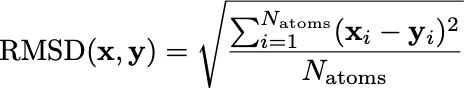

In [ ]:
T = mD.n_frames
N = mD.n_atoms # CA only: 1 atom = 1 residue

rmsdT = np.zeros((T))
X = mD.xyz[0,:,:]  # First frame, all axes, all atoms

for t in range(T):
  Y = mD.xyz[t,:,:]  # Frame at t, all axes, all atoms
  d2 = (X-Y)**2   # This is still a matrix
  sd2 = np.sum(d2)/N
  rmsdT[t]=np.sqrt(sd2)

print(rmsdT)

[0.         0.18571685 0.19279618 0.19937792 0.20930439 0.20195992
 0.19775423 0.20287227 0.20987128 0.21433262 0.2311478  0.24478084
 0.23354026 0.23151626 0.24014238 0.22225498 0.21333127 0.22187131
 0.22903336 0.21742619 0.24297622 0.21857007 0.23659818 0.22402963
 0.21294927 0.2146992  0.2302984  0.21605924 0.21941128 0.2362667
 0.22704358 0.20575509 0.21718043 0.20619905 0.21831335 0.19549925
 0.20085825 0.2291207  0.21160366 0.22307778 0.18905819 0.22139491
 0.26002267 0.22072132 0.2394823  0.23102188 0.22811731 0.24265876
 0.26402941 0.25172197 0.22921849 0.24038019 0.23954615 0.234307
 0.22976187 0.22422404 0.21450699 0.22445034 0.22689724 0.24613216
 0.22687385 0.22659689 0.24168384 0.26651087 0.26872963 0.26826364
 0.27221476 0.26492779 0.28507281 0.27993877 0.28830366 0.30161765
 0.26860165 0.27938768 0.29338744 0.293344   0.23696603 0.24666252
 0.27656901 0.28754534]


Text(0, 0.5, 'Cα RMSD (Å)')

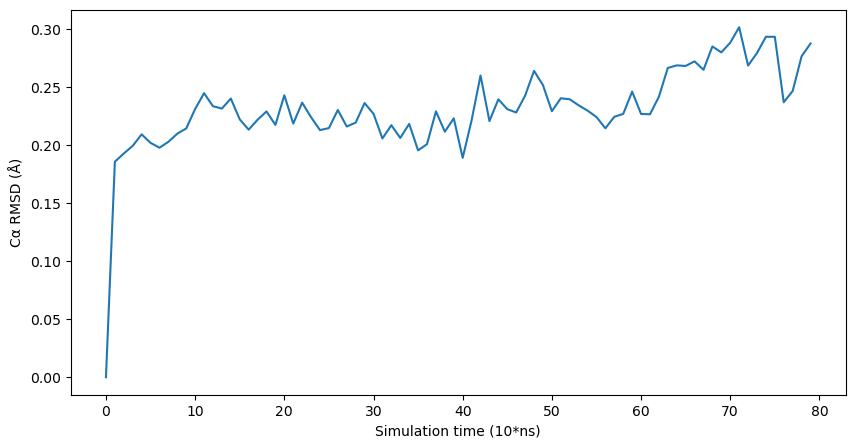

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(T), rmsdT)
plt.xlabel("Simulation time (10*ns)")
plt.ylabel("Cα RMSD (Å)")

## Compute displacements *by residue and time*.

In [ ]:
rmsdRT = np.zeros((T,N))

for i in range(N):
  Xi = mD.xyz[0,i,:] # First frame, all axes, atom i
  for t in range(T):
    Yi = mD.xyz[t,i,:]  # Time t, atom i, 3D vector
    dist = np.sum((Xi-Yi)**2)   # Displacement^2
    rmsdRT[t,i]=np.sqrt(dist)

print(rmsdRT)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.10006325 0.11989453 0.04315603 ... 1.29152727 1.20302927 1.27812302]
 [0.13028523 0.23128945 0.12885948 ... 0.7852124  0.76311409 0.78415805]
 ...
 [0.15816051 0.19697946 0.08786048 ... 0.16796225 0.25669405 0.16283137]
 [0.3974497  0.48974705 0.5196858  ... 1.34624219 1.22654593 1.26326621]
 [0.13185491 0.15318844 0.23314853 ... 0.89744049 0.84258366 0.85937977]]


In [ ]:
rmsdRT.shape

(80, 1590)

Text(0.5, 0, 'Time (ns/10)')

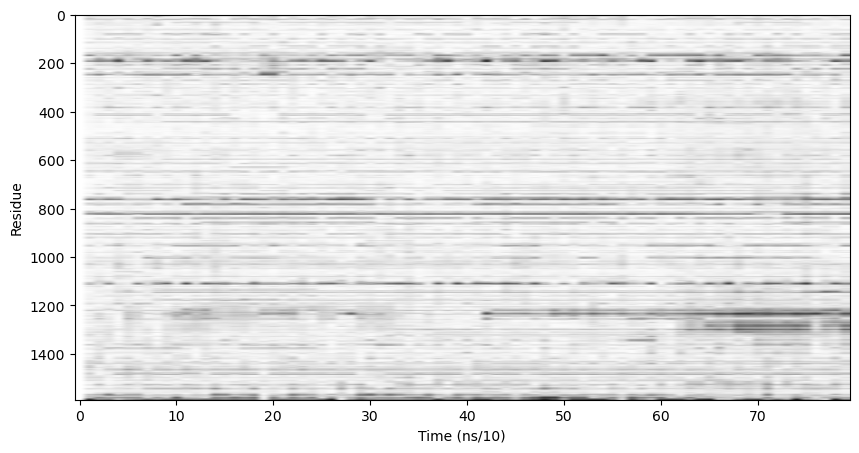

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(rmsdRT.T, aspect="auto", cmap="binary")
plt.ylabel("Residue")
plt.xlabel("Time (ns/10)")

## Question

How to modify the code so that the vertical axis is *actually* residues?

**Hint:** No need to compute for all atoms of a residue.

## Average over time

Text(0, 0.5, 'Mean displacement (A)')

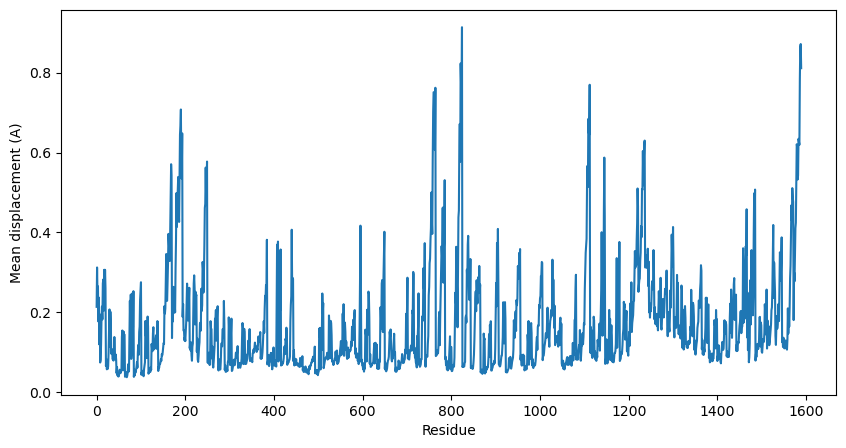

In [ ]:
plt.figure(figsize=(10,5))
rmsdR = np.mean(rmsdRT,axis = 0) # <-- note: mean over axis 0, which is time
plt.plot(np.arange(N), rmsdR)
plt.xlabel("Residue")
plt.ylabel("Mean displacement (A)")